# Assignment 4
Devananth V-EP20BTECH11004

In [ ]:
import numpy as np
import scipy.stats as sc_st
import matplotlib.pyplot as plt
import scipy.optimize

Question 1

Linear Fit Parameters: [ 2.79789861 -1.11028082]
AIC value of Linear fit: 15.309175575502223
BIC value of Linear fit: 17.300640122610204
Quadratic Fit Parameters: [ 0.50261293  2.38475187 -1.05578915]
AIC value of Quadratic fit: 15.496041767569295
BIC value of Quadratic fit: 18.483238588231266
Cubic Fit Parameters: [-0.96724992  1.74451332  1.97184055 -1.02910462]
AIC value of Cubic fit: 17.085043873972353
BIC value of Cubic fit: 21.067972968188315
p value of Quadratic using the linear model as the null hypothesis,= 0.17813275695316733
p value of Cubic using the linear model as the null hypothesis,  = 0.32887884419522884


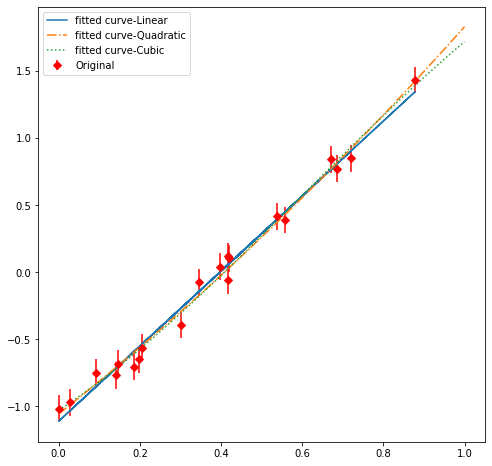

In [ ]:
def linear(x,a,b):
  return a*x+b
def quadratic(x,a,b,c):
  return a*pow(x,2)+b*x+c
def cubic(x,a,b,c,d):
  return a*pow(x,3)+b*pow(x,2)+c*x+d
def lkl_est(func, data, *args):
  return np.product(np.exp(-0.5 * (((data[:,1] - func(data[:,0], *args))/data[:,2]) ** 2) ))
def max_lkl(func, data, args):
  return scipy.optimize.minimize(lambda x: -lkl_est(func, data, *x), args, method='Nelder-Mead').x

sample=np.loadtxt("https://people.iith.ac.in/shantanud/testdata.dat",float)
x=sample[:,0]
y=sample[:,1]
sig_y=sample[:,2]

fit1, cov1 = scipy.optimize.curve_fit(linear,x, y, sigma=sig_y)
a, b = fit1
print("Linear Fit Parameters:",fit1)
y_fit=linear(x,a,b)
res= y- linear(x,a,b)
reschi2_1 = ((res/sig_y)**2).sum()
m_lkl = lkl_est(linear,sample, *max_lkl(linear, sample, fit1))
aic1=2*2-2*np.log(m_lkl)
bic1=-2*np.log(m_lkl)+2*np.log(x.size)
print("AIC value of Linear fit:",aic1)
print("BIC value of Linear fit:",bic1)
fig = plt.figure(1, figsize=(8,8))
plt.errorbar(x, y, yerr = sig_y, fmt = "rD", label = "Original")
plt.plot(x, y_fit, label = "fitted curve-Linear")

fit2, nlpcov = scipy.optimize.curve_fit(quadratic,x, y, sigma=sig_y)
a, b, c = fit2
print("Quadratic Fit Parameters:",fit2)
x_fit = np.linspace(0.0, 1, 100)
y_fit=quadratic(x_fit,a,b,c)
plt.plot(x_fit, y_fit, linestyle='dashdot', label = "fitted curve-Quadratic")
res= y- quadratic(x,a,b,c)
reschi2_2 = ((res/sig_y)**2).sum()
y_fit=quadratic(x,a,b,c)
m_lkl = lkl_est(quadratic,sample, *max_lkl(quadratic, sample, fit2))
aic2=-2*np.log(m_lkl)+2*3
bic2=-2*np.log(m_lkl)+3*np.log(x.size)
print("AIC value of Quadratic fit:",aic2)
print("BIC value of Quadratic fit:",bic2)

fit3, cov3 = scipy.optimize.curve_fit(cubic,x, y, sigma=sig_y)
a, b, c, d = fit3
print("Cubic Fit Parameters:",fit3)
x_fit = np.linspace(0.0, 1, 100)
y_fit=cubic(x_fit,a,b,c,d)
plt.plot(x_fit, y_fit, linestyle='dotted', label = "fitted curve-Cubic")
res= y- cubic(x,a,b,c,d)
reschi2_3 = ((res/sig_y)**2).sum()
y_fit=cubic(x,a,b,c,d)
m_lkl = lkl_est(cubic,sample, *max_lkl(cubic, sample, fit3))
aic3=-2*np.log(m_lkl)+2*4
bic3=-2*np.log(m_lkl)+4*np.log(x.size)
print("AIC value of Cubic fit:",aic3)
print("BIC value of Cubic fit:",bic3)

chi_diff1_2=reschi2_1 -reschi2_2
p_value =1- sc_st.chi2(1).cdf(chi_diff1_2)
print("p value of Quadratic using the linear model as the null hypothesis,=", p_value)
chi_diff2_3=reschi2_1 -reschi2_3
p_value = 1-sc_st.chi2(2).cdf(chi_diff2_3)
print("p value of Cubic using the linear model as the null hypothesis,  =", p_value)

plt.legend()
plt.show()

Question 2

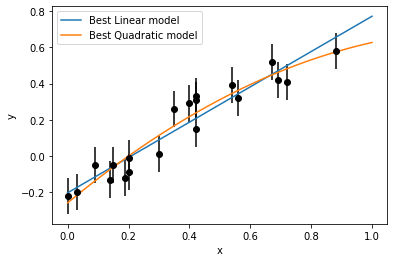

Linear model AIC= 15.324128537430177
Linear model BIC= 17.315593084538158
Quadratic model AIC= 15.462835314715925
Quadratic model BIC= 18.450032135377896


In [ ]:
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39,
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

def poly_fit(theta, x):
    return sum(t * x ** n for (n, t) in enumerate(theta))

def logL(theta, model=poly_fit, data=data):
    x, y, sig_y = data
    y_fit = model(theta, x)
    return sum(sc_st.norm.logpdf(*args)for args in zip(y, y_fit, sig_y))

def best_theta(degree, model=poly_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return scipy.optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

theta1 = best_theta(1)
theta2 = best_theta(2)

xfit = np.linspace(0, 1, 1000)
plt.errorbar(x, y, sigma_y, fmt='ok')
plt.plot(xfit, poly_fit(theta1, xfit), label='Best Linear model')
plt.plot(xfit, poly_fit(theta2, xfit), label='Best Quadratic model')
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.show()

m_lkl1 = lkl_est(linear,data.transpose(), *max_lkl(linear, data.transpose(), theta1))
m_lkl2 = lkl_est(quadratic,data.transpose(), *max_lkl(quadratic, data.transpose(), theta2))

aic1=-2*np.log(m_lkl1)+2*2
aic2=-2*np.log(m_lkl2)+2*3
n=len(x)
bic1=-2*np.log(m_lkl1)+2*np.log(n)
bic2=-2*np.log(m_lkl2)+3*np.log(n)

print("Linear model AIC=", aic1)
print("Linear model BIC=", bic1)
print("Quadratic model AIC=", aic2)
print("Quadratic model BIC=", bic2)



Question 3

https://arxiv.org/pdf/2105.14586.pdf

Kolmogorov–Smirnov Test-Based Actively-Adaptive
Thompson Sampling for Non-Stationary Bandits

On-stationary Multi-Armed Bandit (MAB) framework is considerd and a Kolmogorov-Smirnov (KS) test based Thompson Sampling (TS) algorithm named TS-KS is proposed, that actively detects change points and resets the TS parameters once a change is detected.  Kolmogorov-Smirnov (KS) test based bandit
algorithm that provides asymptotic regret guarantees with an arbitrary probability is used. The TS algorithm actively detects a change-point based on the KS test, using the two sample KS test.

The advantage is that for fixed mean, and a suitable threshold, the KS-test is able to detect a change in the environment which the mean-estimation based detection misses.

Here the KS test is used accurately.

Question 4

In [ ]:
h=sc_st.norm.isf(1.7e-9)
print("Significance in terms of no of sigmas of the Higgs boson discovery claim from the p value =1.7*10^-9:",h)

l=sc_st.norm.isf(2e-7)
print("Significance int terms of no of sigmas of LIGO discovery of GW150914 with p value = 2*10^-7:",l)

chi2=1-sc_st.chi2(67).cdf(65.2)
print("χ2 GOF using the best-fit νμ ↔ ντ oscillation solution of Super-K discovery paper for neutrino oscillations:",chi2)

Significance in terms of no of sigmas of the Higgs boson discovery claim from the p value =1.7*10^-9: 5.911017938341624
Significance int terms of no of sigmas of LIGO discovery of GW150914 with p value = 2*10^-7: 5.068957749717791
χ2 GOF using the best-fit νμ ↔ ντ oscillation solution of Super-K discovery paper for neutrino oscillations: 0.5394901931099038
